# Forward-backward scheduling

In [375]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from psplib import parse as psp

In [432]:
import os
datapath = "/Users/flo/Documents/MiM/Thesis/code/data/"
mplibpath = os.path.join(datapath, "MPLIB")
mplibvpath = {1: os.path.join(mplibpath, "MPLIB1"), 2: os.path.join(mplibpath, "MPLIB1/MPLIB2")}

In [441]:
mplibversion = 1
problem_set = 2
problem_n = 10

In [442]:
problempath = os.path.join(
	mplibvpath[mplibversion],
	"MPLIB {} - Set {}/Instances/MPLIB{}_Set{}_{}.rcmp".format(mplibversion, problem_set, mplibversion, problem_set, problem_n)
)
instance = psp(problempath, instance_format="mplib")
instance

ProjectInstance(resources=[Resource(capacity=24, renewable=True), Resource(capacity=24, renewable=True), Resource(capacity=24, renewable=True), Resource(capacity=24, renewable=True)], activities=[Activity(modes=[Mode(duration=0, demands=[0, 0, 0, 0])], successors=[1, 4], delays=None, optional=False, selection_groups=[], name='1:1'), Activity(modes=[Mode(duration=9, demands=[9, 10, 6, 10])], successors=[2], delays=None, optional=False, selection_groups=[], name='1:2'), Activity(modes=[Mode(duration=1, demands=[4, 10, 10, 8])], successors=[3], delays=None, optional=False, selection_groups=[], name='1:3'), Activity(modes=[Mode(duration=4, demands=[6, 9, 9, 7])], successors=[5], delays=None, optional=False, selection_groups=[], name='1:4'), Activity(modes=[Mode(duration=3, demands=[7, 10, 10, 8])], successors=[5], delays=None, optional=False, selection_groups=[], name='1:5'), Activity(modes=[Mode(duration=4, demands=[10, 10, 7, 10])], successors=[6], delays=None, optional=False, selection_

In [443]:
print("Loaded instance from MPLIB {}, set {}, problem {} with {} resources, {} activities and {} projects.".format(
    mplibversion, problem_set, problem_n, instance.num_resources, instance.num_activities, instance.num_projects))

Loaded instance from MPLIB 1, set 2, problem 10 with 4 resources, 744 activities and 12 projects.


In [444]:
instance.activities

[Activity(modes=[Mode(duration=0, demands=[0, 0, 0, 0])], successors=[1, 4], delays=None, optional=False, selection_groups=[], name='1:1'),
 Activity(modes=[Mode(duration=9, demands=[9, 10, 6, 10])], successors=[2], delays=None, optional=False, selection_groups=[], name='1:2'),
 Activity(modes=[Mode(duration=1, demands=[4, 10, 10, 8])], successors=[3], delays=None, optional=False, selection_groups=[], name='1:3'),
 Activity(modes=[Mode(duration=4, demands=[6, 9, 9, 7])], successors=[5], delays=None, optional=False, selection_groups=[], name='1:4'),
 Activity(modes=[Mode(duration=3, demands=[7, 10, 10, 8])], successors=[5], delays=None, optional=False, selection_groups=[], name='1:5'),
 Activity(modes=[Mode(duration=4, demands=[10, 10, 7, 10])], successors=[6], delays=None, optional=False, selection_groups=[], name='1:6'),
 Activity(modes=[Mode(duration=9, demands=[10, 5, 6, 8])], successors=[7], delays=None, optional=False, selection_groups=[], name='1:7'),
 Activity(modes=[Mode(durati

### Get Earliest Start Times (EST) and Latest Finish Times (LFT)

The `mode_idx` is simply 0 since we only have one mode.

In [445]:
mode_idx = 0

First, calculate all predecessors for each activity.

In [446]:
# pre initiliazing predecessors
act_predecessors = {}
for i in range(instance.num_activities):
    act_predecessors[i] = []
# filling predecessors
for i in range(instance.num_activities):
    act = instance.activities[i]
    for succ in act.successors:
        act_predecessors[succ].append(i)

In [447]:
# act_predecessors

 Then, calculate the earliest start time (EST) and earliest finish time (EFT) for each activity. The EST is the maximum of the finish times of all predecessors. The EFT is the EST plus the duration of the activity.

In [448]:
# pre initializing earliest and latest finish times
est, eft = {}, {}
for i in range(instance.num_activities):
    est[i] = 0
    eft[i] = 0
# calculating earliest start and finish times
for i in range(instance.num_activities):
    act = instance.activities[i]
    act_pre = act_predecessors[i]
    est[i] = int(np.max([est[pre] + instance.activities[pre].modes[mode_idx].duration for pre in act_pre], initial=0))
    eft[i] = int(est[i] + act.modes[mode_idx].duration)

In [449]:
est

{0: 0,
 1: 0,
 2: 9,
 3: 10,
 4: 0,
 5: 14,
 6: 18,
 7: 27,
 8: 35,
 9: 38,
 10: 46,
 11: 48,
 12: 56,
 13: 64,
 14: 74,
 15: 77,
 16: 78,
 17: 79,
 18: 83,
 19: 87,
 20: 90,
 21: 79,
 22: 98,
 23: 108,
 24: 114,
 25: 122,
 26: 131,
 27: 138,
 28: 144,
 29: 146,
 30: 147,
 31: 157,
 32: 160,
 33: 165,
 34: 166,
 35: 171,
 36: 178,
 37: 186,
 38: 187,
 39: 146,
 40: 189,
 41: 194,
 42: 204,
 43: 206,
 44: 213,
 45: 219,
 46: 224,
 47: 194,
 48: 225,
 49: 234,
 50: 241,
 51: 243,
 52: 248,
 53: 258,
 54: 265,
 55: 272,
 56: 274,
 57: 224,
 58: 280,
 59: 287,
 60: 243,
 61: 295,
 62: 0,
 63: 0,
 64: 2,
 65: 12,
 66: 18,
 67: 0,
 68: 20,
 69: 22,
 70: 26,
 71: 27,
 72: 28,
 73: 34,
 74: 37,
 75: 44,
 76: 45,
 77: 48,
 78: 50,
 79: 55,
 80: 56,
 81: 66,
 82: 68,
 83: 75,
 84: 82,
 85: 55,
 86: 88,
 87: 90,
 88: 95,
 89: 103,
 90: 110,
 91: 118,
 92: 126,
 93: 131,
 94: 132,
 95: 135,
 96: 142,
 97: 147,
 98: 156,
 99: 159,
 100: 166,
 101: 171,
 102: 173,
 103: 174,
 104: 175,
 105: 183,
 1

Next, we want to calulcate initital LSTs and LFTs wtih backward recursion. The `upper_bound` is the maximum of the EST times of all activities. 

In [450]:
upper_bound = np.max([est[i] for i in range(instance.num_activities)])
upper_bound = np.sum([instance.activities[i].modes[mode_idx].duration for i in range(instance.num_activities)])
upper_bound

3958

In [451]:
# pre initializing earliest and latest finish times
lst, lft = {}, {}
# for i in range(instance.num_activities):
lst[instance.num_activities] = upper_bound
lft[instance.num_activities] = upper_bound
# define function to calculate latest start time
for i in range(instance.num_activities - 1, -1, -1):
    lft[i] = int(np.min([lst[suc] for suc in instance.activities[i].successors], initial=upper_bound))
    lst[i] = int(lft[i] - instance.activities[i].modes[mode_idx].duration)

Now, we can generate a serial schedule with a simple priority rule based on random selection.

In [452]:
rng = np.random.default_rng(seed=43)
use_pr = True

In [453]:
# pre initializing final variables
est_serial = {}
fin_schedule_serial = {}
start_schedule_serial = {}
scheduled = []

# first dummy activity can be scheduled
for act_j, act_pre in act_predecessors.items():
    if instance.activities[act_j].modes[mode_idx].duration == 0 and len(act_pre) == 0:
        print("Activity {} has no predecessors and duration = 0, so a project start activity".format(act_j))
        scheduled.append(act_j)
        fin_schedule_serial[act_j] = 0
        start_schedule_serial[act_j] = 0
        
assert len(scheduled) == len(instance.projects), "Length of scheduled activities should be equal to the number of projects"

# the serial scheduling algorithm requires num_activities iterations
for i_act in range(instance.num_activities - len(scheduled)):

    # eligible activities are those that are not scheduled and whose predecessors are already scheduled
    eligible_activities = [j for j in range(instance.num_activities) if j not in scheduled and set(act_predecessors[j]) <= set(scheduled)]

    # in case no activities are eligible, the algorithm fails
    if not eligible_activities:
        print('No feasible schedule could be structured.')
        break
    
    print("Eligible activities: ", eligible_activities)
    # Priority rule: random number between 0 and 1
    pr = dict(zip(eligible_activities, rng.random(len(eligible_activities))))
    
        
    while pr:

        # priority rule based on random number            
        if use_pr:
            j = min(pr, key=pr.get)
            del pr[j]
            eligible_activities.remove(j)
        # priority rule based simple first element in list
        else:
            j = eligible_activities.pop(0)
            del pr[j]

        # get the mode of the activity and its duration
        act_j = instance.activities[j].modes[mode_idx]
        act_duration_j = act_j.duration

        # the earliest finish time is defined by the maximum of the finish times of all predecessors + the duration of the activity
        est_serial[j] = int(np.max([fin_schedule_serial[pre] for pre in act_predecessors[j]], initial=0))
        
        # eligible times are the time slots between the earliest start time and the latest start time
        eligible_times = []
        for t in range(est_serial[j], lst[j] + 1):
            # check if it is possible to schedule at t (at least dummy activity should be scheduled)
            if t in fin_schedule_serial.values():
                is_eligible = True
                # check if the activity can be scheduled so that the resource constraints are not violated
                for r in range(instance.num_resources):
                    for moment in range(t, t + act_duration_j + 1):
                        active = [s for s in scheduled if fin_schedule_serial[s] > moment and start_schedule_serial[s] <= moment]
                        if act_j.demands[r] > instance.resources[r].capacity - sum([instance.activities[act_j].modes[mode_idx].demands[r] for act_j in active]):
                            is_eligible = False
                            break
                # if the activity can be scheduled, add the time to the list of eligible times
                if is_eligible:
                    eligible_times.append(t)
        
        # if there is any eligible time, schedule the activity at the earliest possible time
        if eligible_times:
            fin_schedule_serial[j] = np.min(eligible_times) + act_duration_j
            start_schedule_serial[j] = np.min(eligible_times)
            print("Scheduled activity {} at time {}.".format(j, fin_schedule_serial[j] - act_duration_j))
            scheduled.append(j)
            break

Activity 0 has no predecessors and duration = 0, so a project start activity
Activity 62 has no predecessors and duration = 0, so a project start activity
Activity 124 has no predecessors and duration = 0, so a project start activity
Activity 186 has no predecessors and duration = 0, so a project start activity
Activity 248 has no predecessors and duration = 0, so a project start activity
Activity 310 has no predecessors and duration = 0, so a project start activity
Activity 372 has no predecessors and duration = 0, so a project start activity
Activity 434 has no predecessors and duration = 0, so a project start activity
Activity 496 has no predecessors and duration = 0, so a project start activity
Activity 558 has no predecessors and duration = 0, so a project start activity
Activity 620 has no predecessors and duration = 0, so a project start activity
Activity 682 has no predecessors and duration = 0, so a project start activity
Eligible activities:  [1, 4, 63, 67, 125, 126, 130, 187

In [454]:
makespan = fin_schedule_serial[instance.num_activities - 1]
print(f"Found maximum makespan: {makespan} time units")

Found maximum makespan: 1460 time units


In [455]:
usages = np.zeros((instance.num_resources, fin_schedule_serial[instance.num_activities - 1]))

for idx, act in enumerate(instance.activities):
    for resource_idx, demand in enumerate(instance.activities[idx].modes[mode_idx].demands):
        usages[resource_idx, start_schedule_serial[idx] : fin_schedule_serial[idx]] += demand

Text(0.5, 1.0, 'Solution')

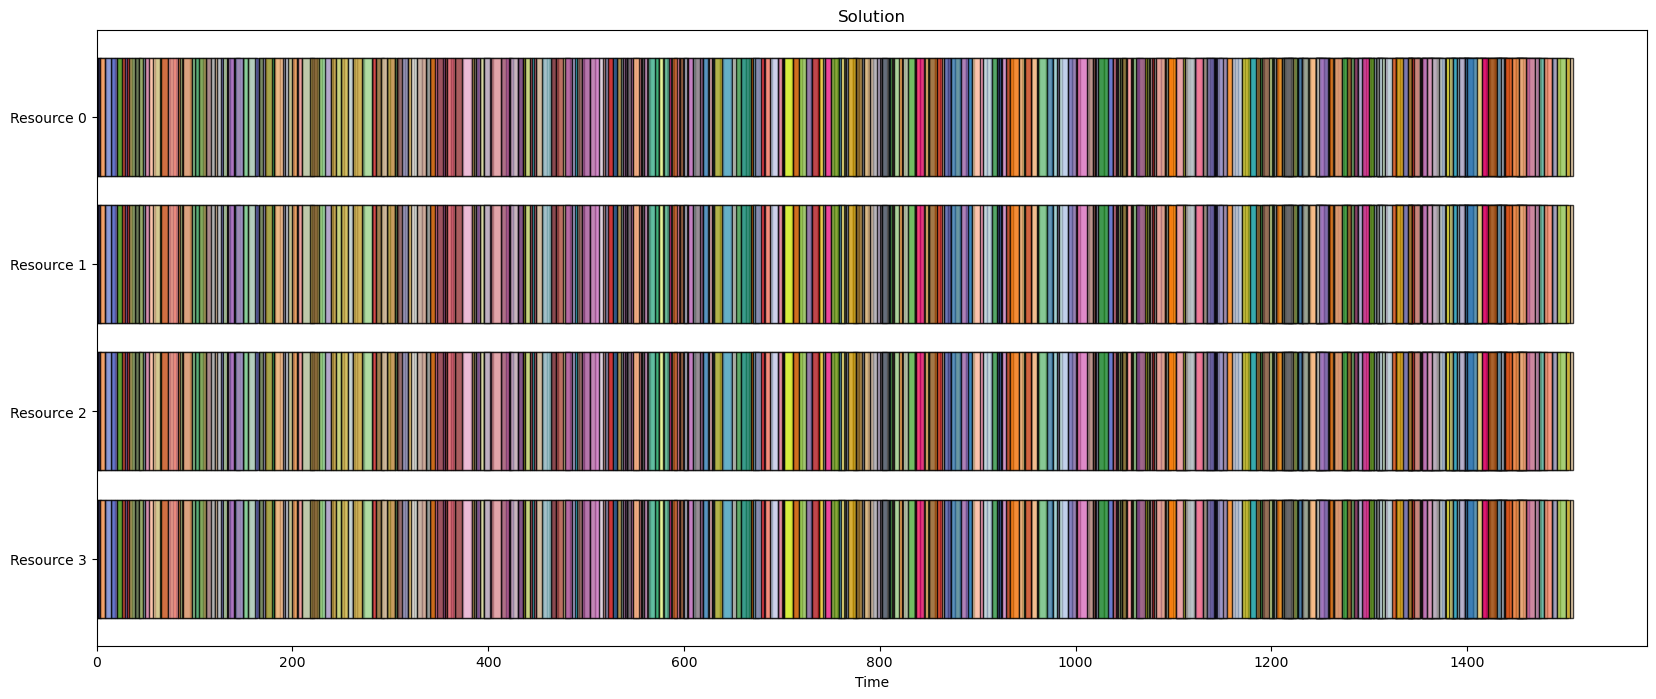

In [456]:
plot_labels = False

fig, ax = plt.subplots(1, 1, figsize=(20, 8))

resources = list(range(instance.num_resources))

task2color = {}

col_names = ["tab20c", "Dark2", "Set1", "tab20b", "Set2", "tab20", "Accent"]
cmaps = [matplotlib.colormaps[name] for name in col_names]
colors = list(dict.fromkeys([color for cmap in cmaps for color in cmap.colors]))

for idx, act in enumerate(instance.activities):
    kwargs = {
        "color": colors[idx % len(colors)],
        "linewidth": 1,
        "edgecolor": "black",
        "alpha": 0.75,
    }
    duration = act.modes[mode_idx].duration
    for resource in range(instance.num_resources):
        if act.modes[mode_idx].demands[resource] > 0:

            ax.barh(
                resource,
                duration,
                left=start_schedule_serial[idx],
                **kwargs,
            )

            if plot_labels:
                ax.text(
                    start_schedule_serial[idx] + duration / 2,
                    resource,
                    f"{idx}",
                    ha="center",
                    va="center",
                )

labels = [f"Resource {idx}" for idx in resources]

ax.set_yticks(ticks=range(len(labels)), labels=labels)
ax.set_ylim(ax.get_ylim()[::-1])

ax.set_xlim(0, ax.get_xlim()[1])  # start time at zero
ax.set_xlabel("Time")
ax.set_title("Solution")

Text(0.5, 0, 'Time')

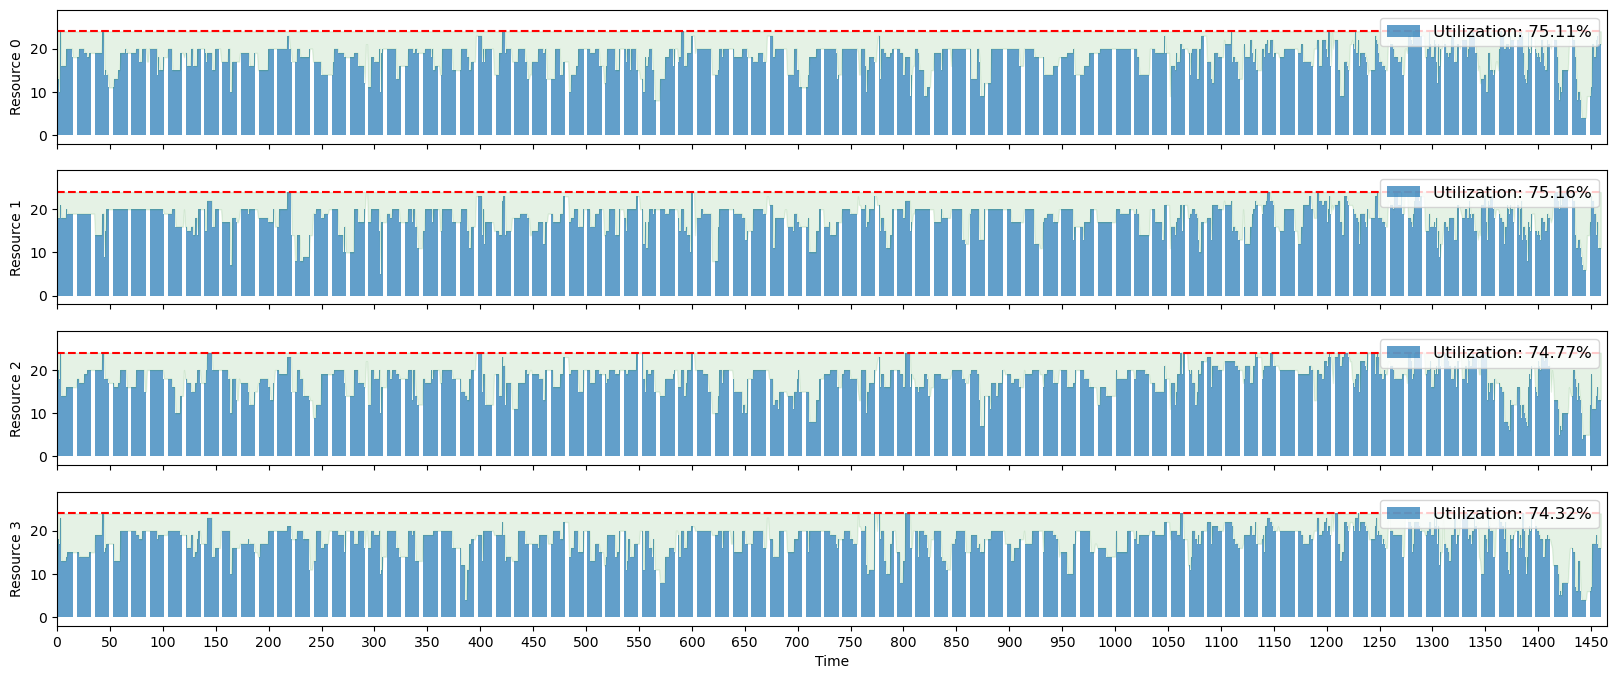

In [457]:
fig, axes = plt.subplots(instance.num_resources, figsize=(20, 8), sharex=True)

resources = list(range(instance.num_resources))

min_cap = np.min([instance.resources[r].capacity for r in resources])
max_cap = np.max([instance.resources[r].capacity for r in resources])

for resource in resources:
    usage = usages[resource]
    ax = axes[resource]
    time = np.arange(len(usage))
    label = f"Resource {resource}"

    ax.bar(time, usage, edgecolor='none', label=f"Utilization: {np.sum(usage) / instance.resources[resource].capacity / len(usages[resource]) * 100:.2f}%", alpha=0.7)
    ax.hlines(instance.resources[resource].capacity, 0, makespan, color="red", linestyle="--")
    ax.fill_between(
        time,
        usage,
        instance.resources[resource].capacity,
        where=usage >= instance.resources[resource].capacity,
        color="red",
        alpha=0.1,
    )
    ax.fill_between(
        time,
        usage,
        instance.resources[resource].capacity,
        where=usage <= instance.resources[resource].capacity,
        color="green",
        alpha=0.1,
    )
    ax.set_ylabel(label)
    ax.set_ylim(-2, max_cap + 5)
    ax.legend(loc="upper right", fontsize=12)

ax.set_xticks(np.arange(0, makespan, 50))
ax.set_xlim(0, makespan + 5)
ax.set_xlabel("Time")

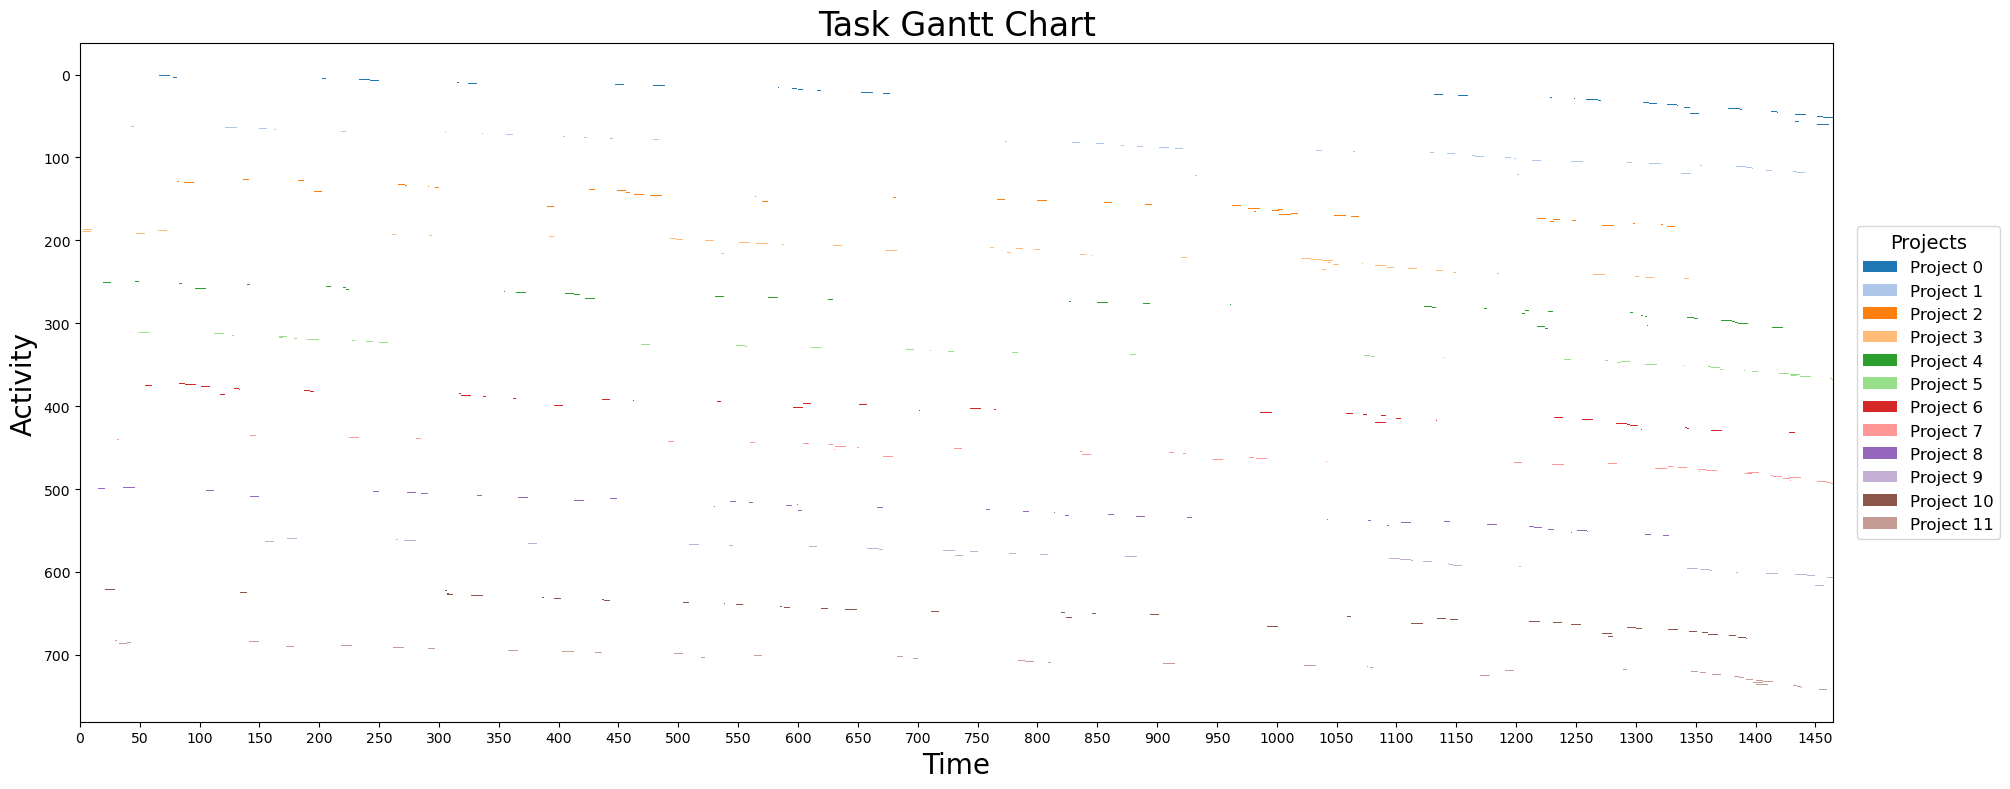

In [471]:
plot_labels = False
color_projects = True

fig, ax = plt.subplots(figsize=(20, 8))

tasks = list(range(instance.num_activities))
projects = list(range(instance.num_projects))

colors = plt.cm.tab20.colors  # Use a qualitative colormap for task colors

# Keep track of which projects have already been added to the legend
handles = {}

for idx, act in enumerate(instance.activities):
    start = start_schedule_serial[idx]
    end = fin_schedule_serial[idx]
    duration = act.modes[mode_idx].duration

    color = colors[idx % len(colors)]
    proj = [p for p in projects if idx in instance.projects[p].activities][0]
    if color_projects:
        color = colors[proj % len(colors)]
    
    handle = ax.barh(
                idx,
                duration,
                left=start,
                align="center",
                color=color,
                edgecolor="none",
                linewidth=5.5,
                label=f"Project {proj}",
            )
    if proj not in handles:
        handles[proj] = handle  # Store the handle for this project

    if plot_labels:
        ax.text(
            x=(start + end) / 2,
            y=idx + 0.1,
            s=f"{idx}",
            va="center",
            ha="center",
            color="black",
        )


if color_projects:
    ax.legend(
        handles=handles.values(),  # Pass the unique handles to the legend
        loc='center right', 
        bbox_to_anchor=(1.1, 0.5),
        fontsize=12,
        title="Projects",
        title_fontsize=14,
    )
ax.set_xlabel("Time", fontsize=20)
ax.set_xticks(np.arange(0, makespan + 5, 50))
ax.set_xlim(0, makespan + 5)
ax.set_ylabel("Activity", fontsize=20)
ax.set_title("Task Gantt Chart", fontsize=24)
ax.invert_yaxis()
plt.tight_layout()  # Optional: adjust layout to avoid clipping

# Graph visiualization using `pyvis`

In [582]:
from pyvis import network as net
import networkx as nx

In [600]:
# define hex colors for projects
hex_colors = [matplotlib.colors.to_hex(color) for color in plt.cm.tab20.colors]
project_colors = {i: hex_colors[i % len(hex_colors)] for i in range(instance.num_projects)}

# create a directed graph
g = net.Network(notebook=True, height="1000px", width="100%", cdn_resources="in_line", directed=False, filter_menu=False, select_menu=False)

# add nodes for each activity
g.add_nodes(list(range(instance.num_activities)),
                        label=[f"Activity {idx}" for idx in range(instance.num_activities)], 
                        value=[act.modes[mode_idx].duration for act in instance.activities],
                        title=["Demands: {}".format(act.modes[mode_idx].demands) for act in instance.activities],
                        color=[hex_colors[[p for p in projects if idx in instance.projects[p].activities][0]] for idx in range(instance.num_activities)]
                        )

# add edges for each activity
for idx, act in enumerate(instance.activities):
    for succ in act.successors:
        g.add_edge(idx, succ, color=project_colors[[p for p in projects if idx in instance.projects[p].activities][0]], title=f"Activity {idx} -> Activity {succ}")
g.set_edge_smooth('dynamic')
g.toggle_physics(True)
# g.show_buttons(filter_=['physics', 'layout'])
# g.show_buttons()
g.set_options("""const options = {
"nodes": {
    "borderWidth": 2,
    "borderWidthSelected": 5,
    "font": {
        "face": "tahoma"
    },
    "size": null
},
"edges": {
    "color": {
        "inherit": true
    },
    "font": {
        "strokeWidth": 5
    },
    "selfReferenceSize": null,
    "selfReference": {
    "angle": 0.7853981633974483
    },
    "smooth": false
},
"layout": {
    "hierarchical": {
        "enabled": false,
        "levelDistance": 150,
        "nodeSpacing": 200,
        "treeSpacing": 20,
        "blockShifting": true,
        "edgeMinimization": true,
        "parentCentralization": true
    }
}
}""")

In [601]:
g.show("mplib_network.html")

mplib_network.html
